<a href="https://colab.research.google.com/github/carlocamilloni/Structural-Bioinformatics/blob/main/Notebooks/lab03_MD_enhanced_martini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Enhanced Sampling and Simplified Models in MD


In this lab experience you will perform two different simulations covering some more advanced topic. Namely:


*   A metadynamics simulation of alanine dipeptide;
*   A self-assembly and equilibration simulation of a lipid bilayer using the Martini force-field.




## Preliminary Operations

To perform the above tasks you first need to install some software, this will require to reinitialise the system.

The first step is to install the conda python package manager

In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:30
🔁 Restarting kernel...


Now we can install GROMACS (a molecular dynamics package) and PLUMED, that is a library to perform enhanced sampling techniques in combination with multiple MD packages, including gromacs (www.plumed.org). Be patient, the next step can take 5 minutes.

In [2]:
!conda install --strict-channel-priority -c plumed/label/masterclass -c conda-forge gromacs

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package

Now you are ready to start, so

1.   Make a copy of this notebook (File -> Save a copy in Drive)
2.   Mount your google drive
3.   Make a new folder for this task using the menus on the left side, for example in /drive/MyDrive/Structural_Bioinformatics make a folder named Task3
4.   In the Task3 folder make a folder named MTD




In [3]:
# mount google drive  
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [5]:
# set the path to your local task folder
mtd_path='/content/drive/MyDrive/Structural_Bioinformatics/Task3/MTD'
%cd {mtd_path}

/content/drive/MyDrive/Structural_Bioinformatics/Task3/MTD


In [7]:
# test the gromacs executable
!gmx mdrun -h

                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

In [8]:
# make a copy of the GitHub structural bioinformatics repository
# this containts usefull input files for runnign the simulatoins
!git clone https://github.com/carlocamilloni/Structural-Bioinformatics.git ../sb --depth 1

Cloning into '../sb'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 49 (delta 6), reused 41 (delta 4), pack-reused 0
Unpacking objects: 100% (49/49), done.
Checking out files: 100% (38/38), done.


##Metadynamics simulations on Alanine Dipetide in Vacuum

In https://github.com/carlocamilloni/Structural-Bioinformatics/blob/main/Notebooks/lab02_MD.ipynb you performed a conventional MD simulation of alanine dipeptide in vacuum. Now you can repeat the same simulation but using Metadynamics to enhance the sampling of conformational space with respect to some conformational parameters, in particular we will use the phi and psi angles.

###System preparation

First of all let's prepare the system as you already done before:

In [13]:
%cd {mtd_path}
%cp ../sb/Data/md/inputs/aladp.pdb .
%cp ../sb/Data/md/mdps/0-em-steep.mdp em.mdp
%cp ../sb/Data/md/mdps/run.mdp .

/content/drive/MyDrive/Structural_Bioinformatics/Task3/MTD


In [12]:
# select force-field
!gmx pdb2gmx -f aladp.pdb -water none -ff amber03
# set the box
!gmx editconf -f conf.gro -bt cubic -d 1 -o boxed.gro
# energy minimisation
!gmx grompp -f em.mdp -c boxed.gro -p topol.top -o em.tpr
!gmx mdrun -deffnm em -v

                     :-) GROMACS - gmx pdb2gmx, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

In [17]:
# From the energy minised file we also make a reference PDB structure that we can use later
!gmx editconf -f em.gro -o reference.pdb

                     :-) GROMACS - gmx editconf, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, B

In [14]:
#now perform a preliminary 10 ns MD simulation, this will last less than 2 minutes
!gmx grompp -f run.mdp -c em.gro -p topol.top -o run.tpr
!gmx mdrun -deffnm run -v -ntomp 1

                      :-) GROMACS - gmx grompp, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

In [15]:
#Now you should have multiple files, in particular run.gro and run.xtc that are 
#the last frame and the trajectory from the MD simulation, respectively.
%ls

 aladp.pdb        em.edr   em.trr           run.edr   run.xtc
 boxed.gro        em.gro   mdout.mdp        run.gro   topol.top
'#boxed.gro.1#'   em.log   posre.itp        run.log  '#topol.top.1#'
 conf.gro         em.mdp  '#posre.itp.1#'   run.mdp
'#conf.gro.1#'    em.tpr   run.cpt          run.tpr


### Metadynamics

PLUMED allows both to analyze simulations trajectories by defining collective variables as well as then use CV based enhanced sampling techniques like Umbrella Sampling and Metadynamics to enhance the sampling of your MD. You can learn more on PLUMED syntax and features here: https://www.plumed.org/masterclass

Furthermore, you can find real-life simulations setups here: www.plumed-nest.org

As a first example let's analyse your MD simulation using plumed. To do so you need to write a plumed input file, that is a text file, including the definition of the quantity and the operation you want to perform. 

You can now copy an example file and see its content:

In [24]:
#copy the file in your mtd folder
%cp ../sb/Data/advanced/metad/plumed-cv.dat .
#print the file on screen
%cat plumed-cv.dat

# Activate MOLINFO functionalities that allow using syntax shortcuts
MOLINFO STRUCTURE=reference.pdb
# Compute the backbone dihedral angle phi, defined by atoms C-N-CA-C
phi: TORSION ATOMS=@phi-2
# Compute the backbone dihedral angle psi, defined by atoms N-CA-C-N
psi: TORSION ATOMS=@psi-2
# Print the two collective variables on COLVAR file every STRIDE steps
PRINT ARG=phi,psi FILE=COLVAR STRIDE=1


In [25]:
#analyse your simulation using plumed executable and your input file
!plumed driver --plumed plumed-cv.dat --mf_xtc run.xtc


DRIVER: Found molfile format trajectory xtc with name run.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:52:46
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 22
PLUMED: File suffix: 
PLUMED: FILE: plumed-cv.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named reference.pdb contains 1 chains 
PLUMED:   chain named   contains residues 1 to 3 and atoms 1 to 22 
PLUMED: Action TORSION
PLUMED:   with label phi
PLUMED:   between atoms 5 7 9 15
PLUMED:   using periodic boundary conditions
PLUMED: Action TORSION
PLUMED:   with label psi

In [28]:
# list files
%ls
# you should have a new COLVAR-CV.txt file

 aladp.pdb        em.edr   em.trr           run.cpt   run.xtc
 boxed.gro        em.gro   mdout.mdp        run.edr   topol.top
'#boxed.gro.1#'   em.log   plumed-cv.dat    run.gro  '#topol.top.1#'
 COLVAR-CV.txt    em.mdp   posre.itp        run.log
 conf.gro         em.pdb  '#posre.itp.1#'   run.mdp
'#conf.gro.1#'    em.tpr   reference.pdb    run.tpr


In [30]:
#let's have a look at it:
#this print on screen only the first tops lines
!head COLVAR-CV.txt
# the file has some header lines reporting the content of the file, in this
# case is three columns reporting time, phi and psi actions that are defined
# in your plumed-cv.dat input file
# then it tells you that phi and psi are defined in some range of values
# then you have the actual data (angles are in radians here)

#! FIELDS time phi psi
#! SET min_phi -pi
#! SET max_phi pi
#! SET min_psi -pi
#! SET max_psi pi
 0.000000 -2.435417 2.364389
 1.000000 -2.738451 2.378010
 2.000000 -1.555183 2.742969
 3.000000 -2.806969 -3.080113
 4.000000 -1.124978 0.287796


Now you can plot the data that should be comparable to what you observed in the former Task.

We plot both phi and psi as a function of the simulation time and we then we scatter plot phi,psi in a Ramachandran plot style

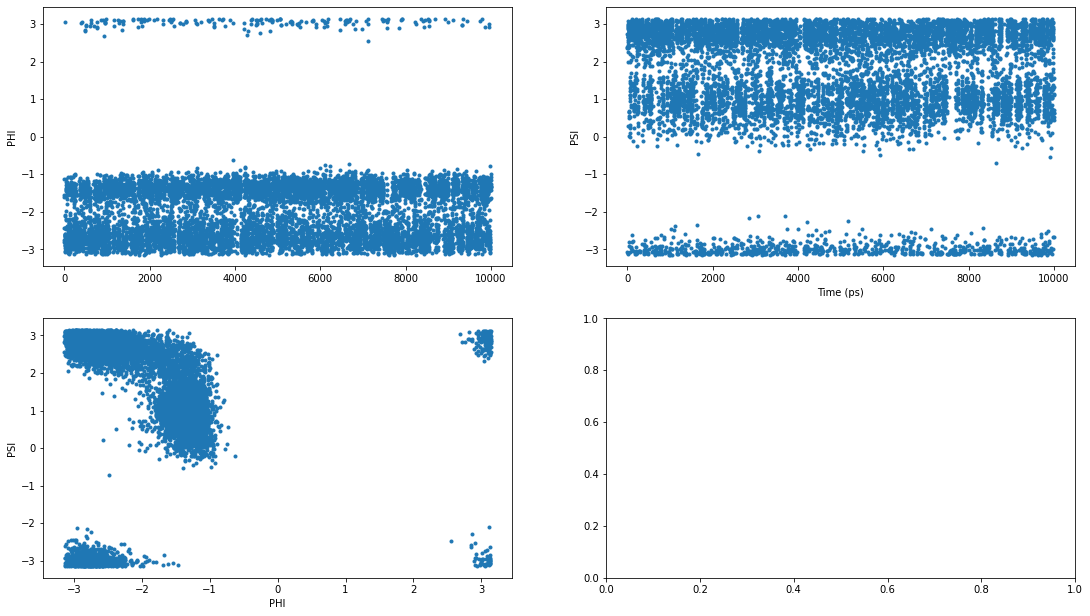

In [42]:
import matplotlib.pyplot as plt
import csv

x=[]
y1=[]
y2=[]

with open('COLVAR-CV.txt', 'r') as file:
    for row in file:
        if row.split()[0] == '#!':
          continue
        x.append(float(row.split()[0]))
        y1.append(float(row.split()[1]))
        y2.append(float(row.split()[2]))

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2,2)
figure.set_size_inches(18.5, 10.5)

axis[0,0].plot(x,y1,'.')
axis[0,0].set_ylabel("PHI")

axis[0,1].plot(x,y2,'.')
axis[0,1].set_ylabel("PSI")
axis[0,1].set_xlabel("Time (ps)")

axis[1,0].plot(y1,y2,'.')
axis[1,0].set_ylabel("PSI")
axis[1,0].set_xlabel("PHI")

plt.show()

Now we can run a Metadynamics simulation and see the difference! Let's first copy and have a look at the input file:

In [43]:
%cp ../sb/Data/advanced/metad/plumed-mtd.dat .
%cat plumed-mtd.dat

# Activate MOLINFO functionalities that allow using syntax shortcuts
MOLINFO STRUCTURE=reference.pdb
# Compute the backbone dihedral angle phi, defined by atoms C-N-CA-C
phi: TORSION ATOMS=@phi-2
# Compute the backbone dihedral angle psi, defined by atoms N-CA-C-N
psi: TORSION ATOMS=@psi-2

# Activate well-tempered metadynamics in phi and psi
metad: METAD ARG=phi,psi ...
# Deposit a Gaussian every 500 time steps, with initial height 
# equal to 1.2 kJ/mol and bias factor equal to 10
  PACE=500 HEIGHT=1.2 BIASFACTOR=10
# Gaussian width (sigma) should be chosen based on the CV fluctuations in unbiased run
# try 1/2 or 1/3 of the estimated fluctuations
  SIGMA=0.2,0.2
# Gaussians will be written to a file HILLS and also stored on grid
  FILE=HILLS.txt GRID_MIN=-pi,-pi GRID_MAX=pi,pi

# Print the two collective variables and the metadynamics bias on COLVAR file every STRIDE steps
PRINT ARG=phi,psi,metad.bias FILE=COLVAR.txt STRIDE=1000



In the above input there is an action `metad` that takes in input the two torsion angles and set some parameters: `PACE` is how often update the histogram; it is the pace at which we learn from the simulation. `HEIGHT` and `SIGMA` are the parameters for the Gaussian that is used to build the histogram. `BIASFACTOR` is the dumping factor, we want our result to be the original one rescaled by a factor of 10, this means that if there is a barrier of 100 kJ/mol at the end it will be only 10 kJ/mol high. `GRID_MIN` and `GRID_MAX` set a grid over which accumulate the histogram.

We will start the simulation from the final configuration obtained from MD. The `-plumed plumed-mtd.dat` flag is telling gromacs to activate plumed by reading the plumed-mtd.dat input file. 



In [44]:
!gmx grompp -f run.mdp -c run.gro -p topol.top -o mtd.tpr

                      :-) GROMACS - gmx grompp, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

In [47]:
# run it, expected to last around 5 minutes
!gmx mdrun -deffnm mtd -plumed plumed-mtd.dat -v -ntomp 1

                      :-) GROMACS - gmx mdrun, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

In [48]:
%ls

 aladp.pdb          em.edr      mtd.cpt        mtd.tpr          run.cpt
 bck.0.COLVAR.txt   em.gro      mtd.edr        mtd.xtc          run.edr
 bck.0.HILLS.txt    em.log     '#mtd.edr.1#'  '#mtd.xtc.1#'     run.gro
 boxed.gro          em.mdp     '#mtd.edr.2#'  '#mtd.xtc.2#'     run.log
'#boxed.gro.1#'     em.pdb      mtd.gro        plumed-cv.dat    run.mdp
 COLVAR-CV.txt      em.tpr      mtd.log        plumed-mtd.dat   run.tpr
 COLVAR.txt         em.trr     '#mtd.log.1#'   posre.itp        run.xtc
 conf.gro           HILLS.txt  '#mtd.log.2#'  '#posre.itp.1#'   topol.top
'#conf.gro.1#'      mdout.mdp   mtd_prev.cpt   reference.pdb   '#topol.top.1#'


To visualise the simulation, you can copy the mtd.xtc and em.gro files on your workstation. Open the em.gro file with VMD and then load into the mtd.xtc file.

### Analysis

While biasing the simulations PLUMED has also performed the analysis on-the-fly of the dihedral angles and the bias, writing the output in the COLVAR-MTD.xtc file, so we can immediately plot it:

In [52]:
#Preliminary look at the file:
!head COLVAR-MTD.txt

#! FIELDS time phi psi metad.bias
#! SET min_phi -pi
#! SET max_phi pi
#! SET min_psi -pi
#! SET max_psi pi
 0.000000 -1.080770 0.450993 0.000000
 2.000000 -1.322684 0.583550 0.757538
 4.000000 -1.269161 0.633380 2.866952
 6.000000 -1.350448 0.153882 0.250041
 8.000000 -2.775121 2.844160 0.000000


Here the fourth column reports the amount of Metadynamcs bias felt by the system at that time in that specific configuration

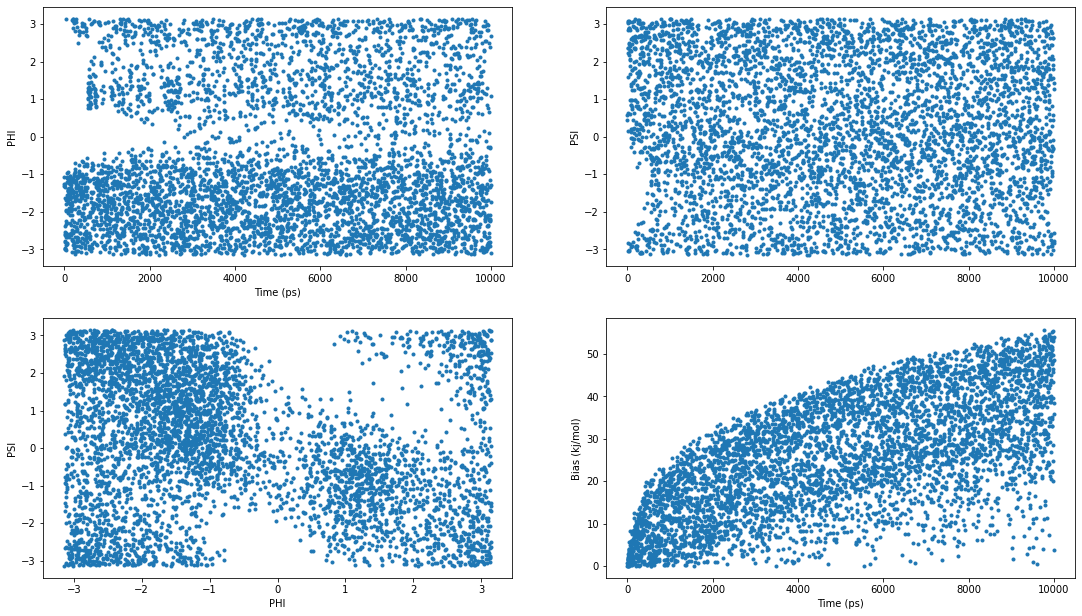

In [51]:
import matplotlib.pyplot as plt
import csv

time=[]
phi=[]
psi=[]
bias=[]

with open('COLVAR-MTD.txt', 'r') as file:
    for row in file:
        if row.split()[0] == '#!':
          continue
        time.append(float(row.split()[0]))
        phi.append(float(row.split()[1]))
        psi.append(float(row.split()[2]))
        bias.append(float(row.split()[3]))

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2,2)
figure.set_size_inches(18.5, 10.5)

axis[0,0].plot(time,phi,'.')
axis[0,0].set_ylabel("PHI")
axis[0,0].set_xlabel("Time (ps)")

axis[0,1].plot(time,psi,'.')
axis[0,1].set_ylabel("PSI")


axis[1,0].plot(phi,psi,'.')
axis[1,0].set_ylabel("PSI")
axis[1,0].set_xlabel("PHI")

axis[1,1].plot(time,bias,'.')
axis[1,1].set_xlabel("Time (ps)")
axis[1,1].set_ylabel("Bias (kj/mol)")

plt.show()

From the above plots it should be evident the speed up obtained it terms of sampling, but this is obtained adding additional energy to the system, the bias, as a consequence the resultign statistics is biased.

We can analyse the growth of the bias by looking at the evolution of the estimated free energy, this allows to recover the free energy as the opposite of the accumulated bias. For simplicity we look separately phi and psi

In [56]:
!plumed sum_hills --hills HILLS.txt --mintozero --outfile fes-phi.txt --idw phi --kt 2.49
!plumed sum_hills --hills HILLS.txt --mintozero --outfile fes-psi.txt --idw psi --kt 2.49

PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:52:46
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /usr/local/lib/plumed
PLUMED: For installed feature, see /usr/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite where appropriate!
PLUMED: Finished setup
PLUMED: Action FAKE
PLUMED:   with label phi
PLUMED: A

In [60]:
!head fes-phi.txt

#! FIELDS phi projection
#! SET min_phi -pi
#! SET max_phi pi
#! SET nbins_phi  89
#! SET periodic_phi true
   -3.141592654    4.314195788
   -3.070995066    2.892481415
   -3.000397478    1.823021274
   -2.929799890    1.110817546
   -2.859202303    0.707000330


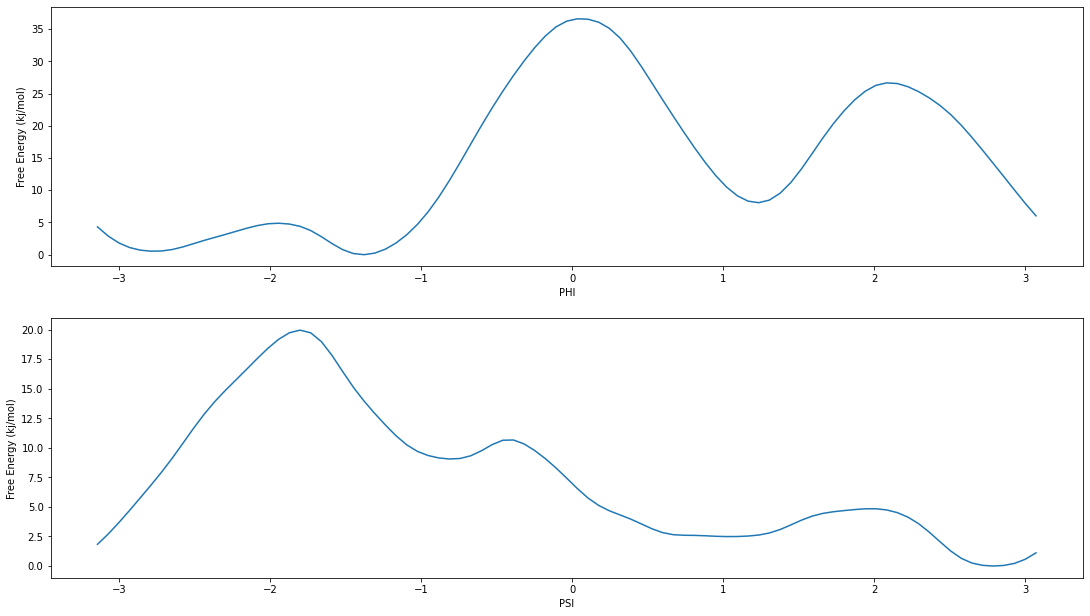

In [64]:
import matplotlib.pyplot as plt
import csv

phi=[]
psi=[]
fes_phi=[]
fes_psi=[]

with open('fes-phi.txt', 'r') as file:
    for row in file:
        if row.split()[0] == '#!':
          continue
        phi.append(float(row.split()[0]))
        fes_phi.append(float(row.split()[1]))
    
file.close()

with open('fes-psi.txt', 'r') as file:
    for row in file:
        if row.split()[0] == '#!':
          continue
        psi.append(float(row.split()[0]))
        fes_psi.append(float(row.split()[1]))

file.close()

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2,1)
figure.set_size_inches(18.5, 10.5)

axis[0].plot(phi,fes_phi)
axis[0].set_xlabel("PHI")
axis[0].set_ylabel("Free Energy (kj/mol)")

axis[1].plot(psi,fes_psi)
axis[1].set_xlabel("PSI")
axis[1].set_ylabel("Free Energy (kj/mol)")

plt.show()

##Self-assembly of a lipid bilayer using the Martini force-field.

We will begin with self-assembling a dipalmitoyl-phosphatidylcholine (DPPC) bilayer from a random configuration of lipids and water in the simulation box. The first step is to create a simulation box containing a random configuration of 128 DPPC lipids. This can be done by starting from a file containing a single DPPC molecule. A file with coordinates for a single DPPC molecule is available for you as DPPC-em.gro. The gromacs tool `insert-molecules` can take this single-molecule conformation and attempt to place it in a simulation box multiple times at a random position and random orientation, each time checking that there are no overlaps between the consecutively placed molecules. 

In [82]:
#make a new folder for this exercise, like
%cd {mtd_path}
%cd ..
%mkdir martini
%cd martini
martini_path=%pwd
#copy all needed files
%cp ../sb/Data/advanced/martini/* .

/content/drive/MyDrive/Structural_Bioinformatics/Task3/MTD
/content/drive/MyDrive/Structural_Bioinformatics/Task3
/content/drive/MyDrive/Structural_Bioinformatics/Task3/martini


In [83]:
%ls

cg_bonds.tcl  martini_eq.mdp            martini_v2.1.itp  water.gro
DPPC-em.gro   martini_md.mdp            minimization.mdp
dppc.top      martini_v2.0_DPPC_01.itp  viz.vmd


In [84]:
!gmx insert-molecules -ci DPPC-em.gro -box 7.5 7.5 7.5 -nmol 128 -radius 0.21 -try 500 -o 128_noW.gro 

                 :-) GROMACS - gmx insert-molecules, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraha

The value of the flag `-radius` (default van der Waals radii) has been increased from its default atomistic length (0.105 nm) to a value reflecting the size of Martini CG beads. Here `noW` stands for no Water. Then we perform a short energy minimization of the system containing only the lipids; the only reason for doing this, is getting rid of high forces between beads that may have been placed too close to each other. 

In [85]:
!gmx grompp -f minimization.mdp -c 128_noW.gro -p dppc.top -o dppc-min-init.tpr
!gmx mdrun -deffnm dppc-min-init -v -c 128_minimized.gro 

                      :-) GROMACS - gmx grompp, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

Then we use the gromacs tool `solvate`, add 6 CG waters per lipid (note that this corresponds to 24 all-atom waters per lipid).

In [86]:
!gmx solvate -cp 128_minimized.gro -cs water.gro -o waterbox.gro -maxsol 768 -radius 0.21 -p dppc.top

                     :-) GROMACS - gmx solvate, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

Also here, the value of the flag `-radius` is used to reflect the size of Martini CG beads. The water beads are taken from the file water.gro provided for you. A new file, waterbox.gro is produced containing the 128 lipids and added water beads.

Now perform an energy minimization again:

In [87]:
!gmx grompp -f minimization.mdp -c waterbox.gro -p dppc.top -o dppc-min-solvent.tpr 
!gmx mdrun -deffnm dppc-min-solvent -v -c minimized.gro 

                      :-) GROMACS - gmx grompp, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

Now, you are ready to run the self-assembly MD simulation. About 20 ns should suffice. The simulation can take around 10 minutes.

In [95]:
!gmx grompp -f martini_md.mdp -c minimized.gro -p dppc.top -o dppc-md.tpr
!gmx mdrun -deffnm dppc-md -v -ntomp 2


                      :-) GROMACS - gmx grompp, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

In order to visualize the trajectory in VMD we need to perform some preprocessing:

In [97]:
!echo "0" | gmx trjconv -s dppc-md.tpr -f dppc-md.xtc -pbc whole -dump 0 -o dppc-md-start.gro
!echo "0" | gmx trjconv -s dppc-md.tpr -f dppc-md.xtc -pbc whole -o dppc-md-viz.xtc

                     :-) GROMACS - gmx trjconv, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

On your laptop you need the two output files (dppc-md-start.gro, dppc-md-viz.xtc) the topology file (dppc.top) and these additional files (cg_bonds.tcl, viz.vmd, martini_v2.1.itp, martini_v2.0_DPPC_01.itp)

In VMD select the menu File -> open visualization and open the viz.vmd file. This should load the above files (if the file names are the same) with the correct visualization (the problem is that since Martini is a coarse-grained representation VMD does not understand automatically what the beads represent).

When the simulation has finished, check whether you got a bilayer. Have a look at the self-assembly process: can you recognize intermediate states, such as micelles, and do you see metastable structures such as a water pore (water spanning the membrane interior) and/or a lipid bridge (lipid tail(s) spanning the water layer)?

If your bilayer was formed in a plane other than the xy-plane, rotate the system so that it will, so for example 

In [98]:
#if you need to rotate around x: (remove the # from the one you need)
#!gmx editconf -f dppc-md.gro -rotate 90 0 0 -o dppc-md-xy.gro 

#or if you need to rotate around y
#!gmx editconf -f dppc-md.gro -rotate 0 90 0 -o dppc-md-xy.gro 

#otherwise, for simplicity, unccoment this
#%cp dppc-md.gro dppc-md-xy.gro

The spontaneous assembly simulation was done using isotropic pressure coupling. The bilayer may have formed but is probably under tension because of the isotropic pressure coupling. Therefore, we first need to run a simulation in which the area of the bilayer can reach a proper equilibrium value. This requires that we use independent pressure coupling in the plane and perpendicular to the plane. Set up a simulation for another 20 ns at zero surface tension 

To get the (projected) area per lipid, you can simply divide the area of your simulation box by half the number of lipids in your system. The box-sizes can be obtained by running the gromacs tool `gmx energy` (ask for Box-X or Box-Y)

In [99]:
#check the area per lipid
!echo "11\n\n" | gmx energy -f dppc-md.edr -o box-x.xvg

                      :-) GROMACS - gmx energy, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

In [ ]:
!gmx grompp -f martini_eq.mdp -c dppc-md-xy.gro -p dppc.top -o dppc-eq.tpr
!gmx mdrun -deffnm dppc-eq -v -ntomp 2

                      :-) GROMACS - gmx grompp, 2019.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

In [ ]:
!echo "0" | gmx trjconv -s dppc-eq.tpr -f dppc-eq.xtc -pbc whole -dump 0 -o dppc-eq-start.gro
!echo "0" | gmx trjconv -s dppc-eq.tpr -f dppc-eq.xtc -pbc whole -o dppc-eq-viz.xtc

#Report

Start by creating a new notebook, using File -> New Notebook. New notebooks are created in your google drive, in a Colab Notebooks folder.

When you are in the new notebook, generally named "Untitled.ipynb", select File -> Move and move it to your Task3 folder.

Rename the notebook as Report_Task3.ipynb

You can then copy and paste the following cells and then modify them as appropriate. The resulting notebook will be your first report.

#Metadynamics and simple models simulations

your name

In [ ]:
from datetime import date

today = date.today()
print(today)